## First Baseline model experiment using SPoC and epoched data



In [26]:
from ECoG.utils import *

from mne.decoding import SPoC as SPoc
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

In [27]:
data_dir = 'C:\\Users\\anellim1\Develop\Econ\BCICIV_4_mat\\'
file_name = 'sub1_comp.mat'
sampling_rate = 1000

In [45]:
X, y = import_data(data_dir, file_name, 0)

print('Example of fingers position : {}'.format(y[0]))
print('epochs with events generation')
epochs = create_epoch(X, sampling_rate, 4., 1)

The input data are of shape: (400000, 62), the corresponding y shape (filtered to 1 finger) is: (400000,)
Example of fingers position : -0.4001128575793339
epochs with events generation
Creating RawArray with float64 data, n_channels=62, n_times=400000
    Range : 0 ... 399999 =      0.000 ...   399.999 secs
Ready.
133 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


In [46]:
X = epochs.get_data()

Loading data for 133 events and 4000 original time points ...
0 bad epochs dropped


In [47]:
print('max {}'.format(y.max()))
print('mean {}'.format(y.mean()))
print('min {} '.format(y.min()))
print('std {} '.format(y.std()))
print('resampling...')
y = y_resampling(y, X.shape[0])
print('max {}'.format(y.max()))
print('mean {}'.format(y.mean()))
print('min {} '.format(y.min()))
print('std {} '.format(y.std()))

max 5.4196301998084655
mean -0.032222685392342215
min -1.0712949036138393 
std 0.845161055778802 
resampling...
max 1.8785031896957007
mean -0.03223683739994016
min -0.6473494108463916 
std 0.44832023491749556 


In [31]:
print('X shape {}, y shape {}'.format(X.shape, y.shape))

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

print('X_train shape {}, y_train shape {} \n X_test shape {}, y_test shape {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X shape (133, 62, 4000), y shape (133,)
X_train shape (93, 62, 4000), y_train shape (93,) 
 X_test shape (40, 62, 4000), y_test shape (40,)


In [32]:
spoc_estimator = SPoc(n_components=10, log=True, reg='oas', rank='full')
pipeline = make_pipeline(spoc_estimator, Ridge())


In [33]:
pipeline.fit(X_train, y_train)

Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 62 from info
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from 

Pipeline(steps=[('spoc',
                 SPoC(cov_method_params=None, log=True, n_components=10, rank='full',
   reg='oas', transform_into='average_power')),
                ('ridge', Ridge())])

In [34]:
y_new_train = pipeline.predict(X_train)
y_new = pipeline.predict(X_test)


In [42]:
print('mean squared error {}'.format(mean_squared_error(y_test, y_new)))
print('root mean squared error {}'.format(mean_squared_error(y_test, y_new, squared=False)))
print('mean absolute error {}'.format(mean_absolute_error(y_test, y_new)))

mean squared error 0.19370871134700282
root mean squared error 0.44012351828435936
mean absolute error 0.3214465894716143


# Plot the y predicted respect to the true y.

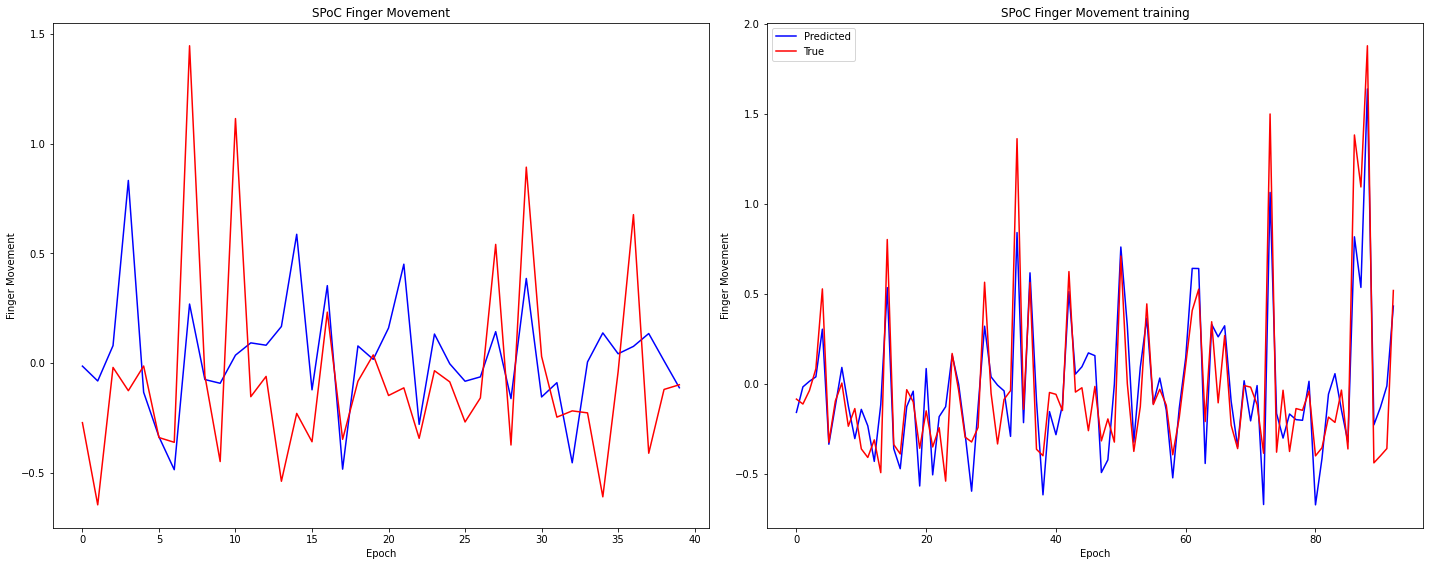

In [40]:
# plot y_new against the true value
fig, ax = plt.subplots(1, 2, figsize=[20, 8])
times = np.arange(y_new.shape[0])
ax[0].plot(times, y_new, color='b', label='Predicted')
ax[0].plot(times, y_test, color='r', label='True')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Finger Movement')
ax[0].set_title('SPoC Finger Movement')

times = np.arange(y_new_train.shape[0])
ax[1].plot(times, y_new_train, color='b', label='Predicted')
ax[1].plot(times, y_train, color='r', label='True')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Finger Movement')
ax[1].set_title('SPoC Finger Movement training')
plt.legend()
mne.viz.tight_layout()
plt.show()
